## **Loss Functions**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(100, 1)
y = 2 * X + 1 + 0.1 * np.random.rand(100, 1)

class LinearRegression:
    def __init__(self):
        self.weights = np.random.rand(1, 1)
        self.bias = np.random.rand(1)
        
    def forward (self, X):
        return X.dot(self.weights) + self.bias

# training loop
def training_loop (model, loss_fn, num_epochs, learning_rate = 0.01):
    losses = []
    for epoch in range (num_epochs):
        y_pred = model.forward(X)
        loss = loss_fn(y, y_pred)
        losses.append(loss)
        
        gradient_w = -2 * X.T.dot(y - y_pred) / len(X)
        gradient_b = -2 * np.sum(y - y_pred) / len(X)
        
        model.weights -= learning_rate * gradient_w
        model.bias -= learning_rate * gradient_b
        
    return losses

#Run Loss Function Sampler
# model = LinearRegression()
num_epochs = 100
        
#MSE
# loss_fn = lambda y, y_pred: np.mean((y - y_pred)**2)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def hubber_loss (y_true, y_pred, delta=1.0):
    
    abs_diff = np.abs(y_true - y_pred)
    quadratic = np.minimum(abs_diff, delta)
    linear = abs_diff - quadratic
    return np.mean(0.5*np.square(quadratic) + delta * linear)

def log_cosh_log (y_true, y_pred):
    return np.mean(np.log(np.cosh(y_true - y_pred)))

def quantile_loss (y_true, y_pred, delta=0.5):
    error = y_true - y_pred
    return np.mean(np.maximum(delta * error, (delta - 1) * error))

#Loss function Sampler
loss_functions = [
    ('mean_squared_error', mean_squared_error),
    ('mean_absolute_error', mean_absolute_error),
    ('hubber_loss', hubber_loss),
    ('log_cosh_log', log_cosh_log),
    ('quantile_loss', quantile_loss),
]

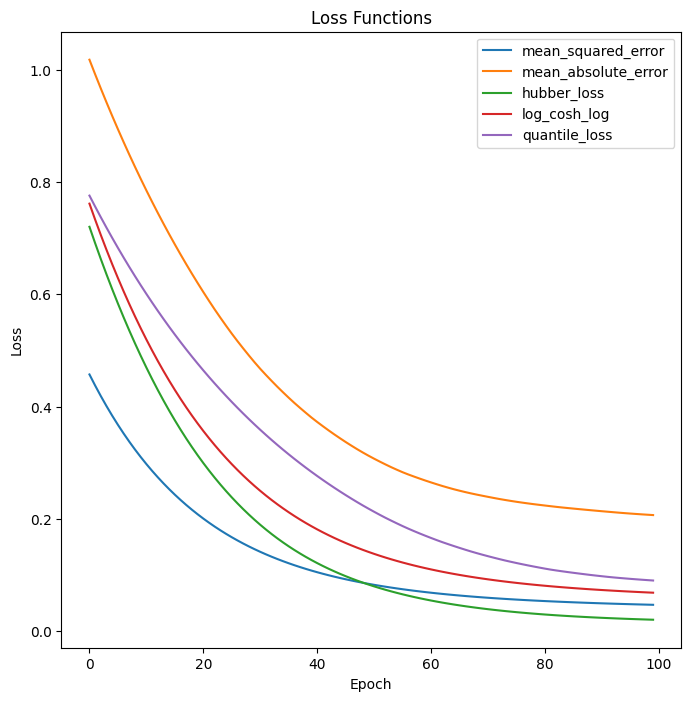

In [3]:
plt.figure(figsize=(8, 8))
for loss_name, loss_fn in loss_functions:
    model = LinearRegression()
    losses = training_loop(model, loss_fn, num_epochs)
    plt.plot(losses, label=loss_name)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Functions')
    
    # print(losses[-1])
plt.show()

In [4]:
print("Input: ", X)
print("")
print("Target: ", y)

Input:  [[0.928595  ]
 [0.2851353 ]
 [0.30365782]
 [0.97842754]
 [0.47402493]
 [0.94130974]
 [0.53929349]
 [0.8278096 ]
 [0.20298655]
 [0.592507  ]
 [0.67430357]
 [0.43218303]
 [0.54634254]
 [0.21309675]
 [0.43490621]
 [0.07905388]
 [0.84354269]
 [0.09309165]
 [0.16290107]
 [0.31342546]
 [0.48297845]
 [0.23421396]
 [0.95323566]
 [0.86092411]
 [0.34361507]
 [0.35571695]
 [0.34355105]
 [0.33991046]
 [0.29206827]
 [0.47956253]
 [0.23808231]
 [0.61676881]
 [0.61142708]
 [0.43273158]
 [0.91214092]
 [0.00440805]
 [0.91009938]
 [0.93810716]
 [0.82743741]
 [0.88945006]
 [0.26910314]
 [0.95816447]
 [0.62240346]
 [0.1816058 ]
 [0.93008306]
 [0.48090801]
 [0.36542071]
 [0.29220931]
 [0.60971771]
 [0.22835592]
 [0.22062212]
 [0.03365115]
 [0.32692739]
 [0.89434073]
 [0.07670714]
 [0.63712311]
 [0.58800481]
 [0.80792337]
 [0.2996396 ]
 [0.25551386]
 [0.64051978]
 [0.37336308]
 [0.08822621]
 [0.57921582]
 [0.35990155]
 [0.39148516]
 [0.2543726 ]
 [0.68196189]
 [0.95989557]
 [0.01756445]
 [0.25962281

## **Logistic Regression**

In [28]:
np.random.seed(42)
X = np.random.rand(100, 2)
y = ([X[:, 0] ] + X[:, 1] > 1.0).astype(int)
# y = y.reshape(-1, 1)

In [29]:
class LogisticRegression:
    def __init__(self):
        self.weights = np.random.rand(2)
        self.bias = np.random.rand(1)
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def forward(self, X):
        z = X.dot(self.weights) + self.bias
        return self.sigmoid(z)

In [22]:
a = np.random.rand(2)
a

array([0.64203165, 0.08413996])

In [30]:
# training loop
def training_loop (model, loss_fn, num_epochs=100, learning_rate = 0.01):
    losses = []
    for epoch in range (num_epochs):
        y_pred = model.forward(X)
        y_reshaped = y.reshape(y_pred.shape)
        loss = loss_fn(y, y_pred)
        losses.append(loss)
        
        gradient_w = -X.T.dot(y_reshaped - y_pred) / len(X)
        gradient_b = -np.sum(y_reshaped - y_pred) / len(X)
        
        model.weights -= learning_rate * gradient_w
        model.bias -= learning_rate * gradient_b
        
    return losses

#Run Loss Function Sampler
model = LogisticRegression()
num_epochs = 100

In [31]:

def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15 #to avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

def hinge_loss(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred))

def log_loss(y_true, y_pred):
    epsilon = 1e-15 #to avoid log(0)
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

def squared_hinge_loss(y_true, y_pred):
    return np.mean(np.maximum(0, 1 - y_true * y_pred)**2)

def exponential_loss(y_true, y_pred):
    return np.mean(np.exp(-y_true * y_pred))

In [37]:
#Loss function Sampler
loss_functions = [
    ('Binary Cross Entropy Loss', binary_cross_entropy_loss),
    ('Hinge Loss', hinge_loss),
    ('Squared Hinge Loss', squared_hinge_loss),
    ('LogLoss', log_loss),
    ('Exponential Loss', exponential_loss),
]

0.808756346664152
0.6797414803469625
0.59823139641271
0.7558454078289027
0.7955420200213221


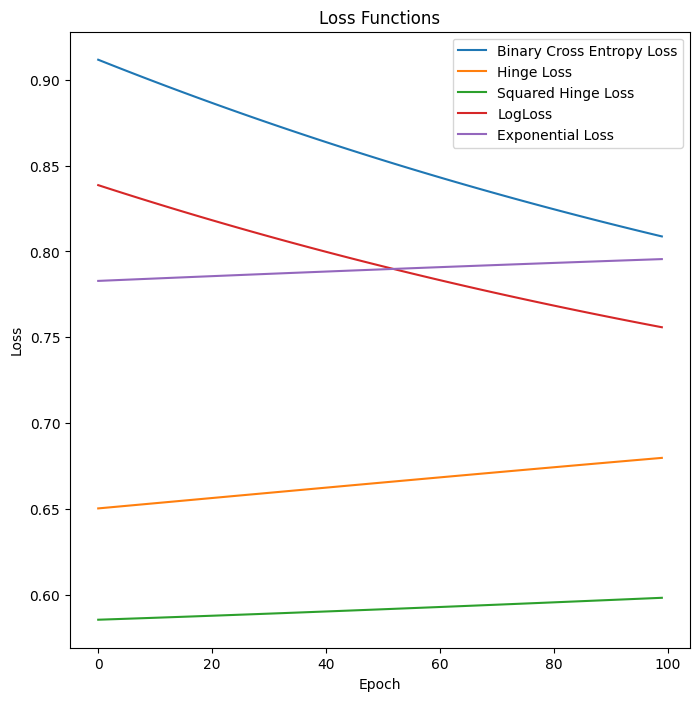

In [38]:
plt.figure(figsize=(8, 8))
for loss_name, loss_fn in loss_functions:
    model = LogisticRegression()
    # y_true = y.reshape(-1, 1)
    losses = training_loop(model, loss_fn, num_epochs)
    plt.plot(losses, label=loss_name)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss Functions')
    
    print(losses[-1])
plt.show()